Import necassary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

Import and display the dataset. find other dataset that has missing value and imbalanced class (target)

In [2]:
df = pd.read_csv(r"C:\Users\Jun Hong\OneDrive - Developer Program\UTM\S3.3_MRTB2173 AGILE DATA SCIENCE\7_PMA\heart_disease_project\data\heart_disease.csv")

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


(   Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
 0    Male   39   postgraduate              0         0.0     0.0   
 1  Female   46  primaryschool              0         0.0     0.0   
 2    Male   48     uneducated              1        20.0     0.0   
 3  Female   61       graduate              1        30.0     0.0   
 4  Female   46       graduate              1        23.0     0.0   
 
   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
 0              no             0         0    195.0  106.0   70.0  26.97   
 1              no             0         0    250.0  121.0   81.0  28.73   
 2              no             0         0    245.0  127.5   80.0  25.34   
 3              no             1         0    225.0  150.0   95.0  28.58   
 4              no             0         0    285.0  130.0   84.0  23.10   
 
    heartRate  glucose Heart_ stroke  
 0       80.0     77.0            No  
 1       95.0     76.0            No  
 2       

Check total missing value

In [3]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

METHOD 1: simply drop row of missing value

In [4]:
df_drop = df.dropna()

df_drop.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

do classification

In [5]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [6]:
label_encoder = LabelEncoder()
df_drop['Heart_ stroke'] = label_encoder.fit_transform(df_drop['Heart_ stroke'])
df_drop['education'] = label_encoder.fit_transform(df_drop['education'])
df_drop['Gender'] = label_encoder.fit_transform(df_drop['Gender'])
df_drop['prevalentStroke'] = label_encoder.fit_transform(df_drop['prevalentStroke'])

df_drop.head()

C:\Users\Jun Hong\AppData\Local\Temp\ipykernel_22040\209979163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['Heart_ stroke'] = label_encoder.fit_transform(df_drop['Heart_ stroke'])
C:\Users\Jun Hong\AppData\Local\Temp\ipykernel_22040\209979163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['education'] = label_encoder.fit_transform(df_drop['education'])
C:\Users\Jun Hong\AppData\Local\Temp\ipykernel_22040\209979163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,3,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
X = df_drop.drop(['Heart_ stroke'],axis=1)  #input
y = df_drop['Heart_ stroke']  #output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

METHOD 2: data imputation

In [20]:
# Create a copy of the dataset
df_impute = df.copy()

# Impute missing values for numerical columns
numerical_columns = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Create an imputer for numerical data using the median strategy
numerical_imputer = SimpleImputer(strategy='median')

# Apply the imputer to the numerical columns
df_impute[numerical_columns] = numerical_imputer.fit_transform(df_impute[numerical_columns])

# Impute missing values for categorical columns (e.g., 'Heart_ stroke')
categorical_columns = ['Heart_ stroke']

# Create an imputer for categorical data using the most frequent strategy (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical column
df_impute[categorical_columns] = categorical_imputer.fit_transform(df_impute[categorical_columns])

# Check the dataframe after imputation
print(df_impute.isnull().sum())  # Verify that there are no more missing values

age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
prevalentHyp     0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Heart_ stroke    0
dtype: int64


Do classification

In [21]:
label_encoder = LabelEncoder()
df_impute['Heart_ stroke'] = label_encoder.fit_transform(df_impute['Heart_ stroke'])

X = df_impute.drop(['Heart_ stroke'],axis=1)  #input
y = df_impute['Heart_ stroke']  #output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8525943396226415
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.44      0.03      0.06       124

    accuracy                           0.85       848
   macro avg       0.65      0.51      0.49       848
weighted avg       0.80      0.85      0.79       848



C:\Users\Jun Hong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Handling imbalanced classes

In [22]:
label_encoder = LabelEncoder()
df_impute['Heart_ stroke'] = label_encoder.fit_transform(df_impute['Heart_ stroke'])

X = df_impute.drop(['Heart_ stroke'],axis=1)  #input
y = df_impute['Heart_ stroke']  #output

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())

Heart_ stroke
0    3594
1    3594
Name: count, dtype: int64


do classification

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.631432545201669
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63       752
           1       0.60      0.66      0.63       686

    accuracy                           0.63      1438
   macro avg       0.63      0.63      0.63      1438
weighted avg       0.63      0.63      0.63      1438



C:\Users\Jun Hong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data Preprocessing

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\Jun Hong\OneDrive - Developer Program\UTM\S3.3_MRTB2173 AGILE DATA SCIENCE\7_PMA\heart_disease.csv")

# Drop irrelevant columns
df = df.drop(['Gender', 'education', 'prevalentStroke'], axis=1)

# Handle missing values
numerical_imputer = SimpleImputer(strategy='median')
numerical_columns = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Encode categorical labels
label_encoder = LabelEncoder()
df['Heart_ stroke'] = label_encoder.fit_transform(df['Heart_ stroke'])

Model Training

In [34]:
# Split data into features and target
X = df.drop(['Heart_ stroke'], axis=1)
y = df['Heart_ stroke']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.631432545201669
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63       752
           1       0.60      0.66      0.63       686

    accuracy                           0.63      1438
   macro avg       0.63      0.63      0.63      1438
weighted avg       0.63      0.63      0.63      1438



C:\Users\Jun Hong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Interactive Dashboard Using Streamlit

2025-02-02 12:26:37.199 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 12:26:37.334 
  command:

    streamlit run C:\Users\Jun Hong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-02 12:26:37.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 12:26:37.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 12:26:37.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 12:26:37.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 12:26:37.336 Thread 'MainThread': missing ScriptRunContext! Thi

DeltaGenerator()

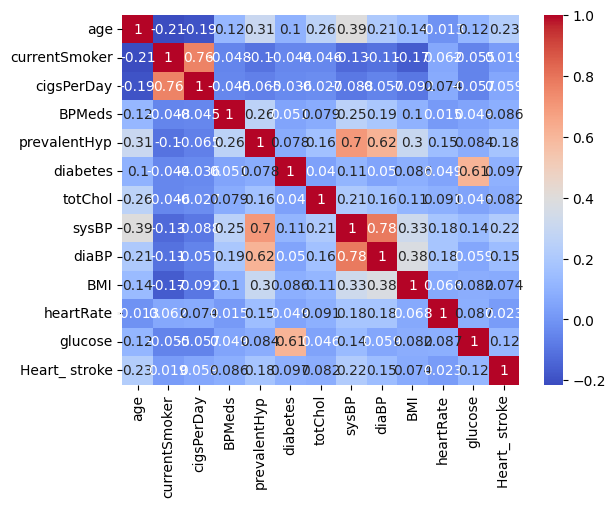

In [36]:
import streamlit as st

st.title("Heart Disease Prediction Dashboard")

# Model evaluation metrics
st.write("### Model Performance")
st.write("Accuracy Score:", accuracy_score(y_test, y_pred))
st.write("Classification Report:")
st.text(classification_report(y_test, y_pred))

# Feature importance visualization
st.write("### Feature Correlation")
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax)
st.pyplot(fig)